In [1]:
import keras
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image_paths = os.listdir('car_images')
full_image_paths = []
for image in image_paths:
    full_image_paths.append(f"car_images/{image}")

image_labels = []

for x in range(len(full_image_paths)):
    label_split = image_paths[x].split('_')
    image_labels.append(label_split[0])

label_encoder = LabelEncoder()
label_encoder.fit(image_labels)
encoded_y = label_encoder.transform(image_labels)

In [35]:
def predict(img_path, model):
    
    # image folder
    folder_path = '../Project_4/10_test'
    # path to model
    model_path = '../Project_4/optimized_model.h5'
    # dimensions of images
    img_width, img_height = 320, 240

    # load the trained model
    model = keras.models.load_model('optimized_model.h5')


    # load all images into a list
    #images = []
        #for img in os.listdir(folder_path):
    #img = os.path.join(folder_path, img)
    array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    resized_array = cv2.resize(array,(320,240),interpolation=cv2.INTER_AREA)
    resized_array_rgb = cv2.cvtColor(resized_array,cv2.COLOR_GRAY2RGB)
    image_array = np.array(resized_array_rgb).reshape(-1, 240, 320, 3)
    #images.append(image_array)

    # stack up images list to pass for prediction
    #images = np.vstack(images)
    classes = model.predict_classes(image_array)
    print(classes)

    predictions = model.predict(image_array)
    probability = np.amax(predictions)
    #print(f'Car Model: {classes} , Prediction: {predictions}, Probability: {probability}')
    #return probs_top_list, index_top_list
    return probability, predictions

In [36]:
model_path = '/Project_4'
folder_path= '../Project_4/10_test'
img_path = folder_path + '/Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_hiG.jpg'


probability1, prediction1 = predict(img_path, model_path)
    
print(probability1)
print([prediction1])

[8]
0.83897674
[array([[2.2846063e-08, 4.8764894e-12, 7.0031099e-05, 2.0932084e-02,
        2.2083904e-04, 7.2052464e-10, 4.0510509e-04, 1.8170508e-02,
        8.3897674e-01, 8.6527550e-08, 8.0175813e-09, 8.1490992e-07,
        1.0592705e-18, 1.4380697e-03, 7.5205997e-02, 1.3037703e-14,
        2.8038432e-03, 1.3082104e-03, 1.0863471e-06, 2.2063873e-07,
        7.7827135e-05, 1.7795428e-03, 2.9989182e-09, 1.1303825e-07,
        6.5294562e-06, 2.0574118e-06, 6.8079066e-03, 6.3488906e-13,
        4.3093323e-04, 4.4814339e-09, 3.0732288e-05, 1.9375764e-06,
        1.3989033e-02, 5.9927115e-03, 3.3653638e-08, 7.4326922e-13,
        1.4530985e-04, 4.3834245e-07, 9.9664871e-03, 4.3256744e-04,
        8.0219685e-04, 1.9884240e-12]], dtype=float32)]


In [37]:
# sorting the predictions in descending order
sorting = (-prediction1).argsort()

# getting the top 2 predictions
sorted_ = sorting[0][:5]

for value in sorted_:
    # you can get your classes from the encoder(your_classes = encoder.classes_) 
    
    #job lib??? - label encoder is not working
    
    
    # or from a dictionary that you created before.
    # And then we access them with the predicted index.
    #predicted_label = your_classes[value]

    # just some rounding steps
    prob = (prediction1[0][value]) * 100
    prob = "%.2f" % round(prob,2)
    print(prob)
    #print("I have %s%% sure that it belongs to %s." % (prob,predicted_label))

83.90
7.52
2.09
1.82
1.40


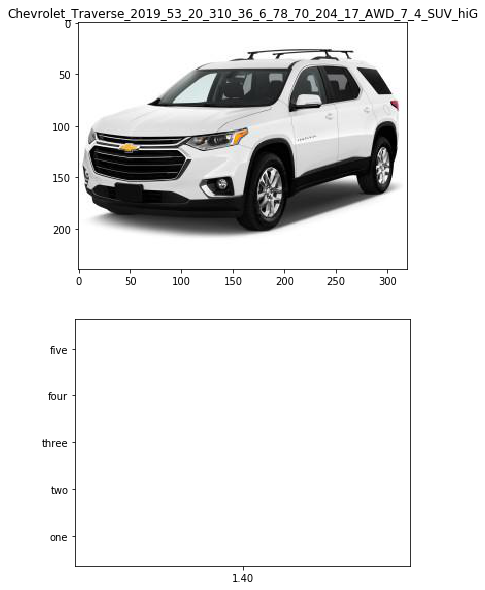

In [38]:
# Plotting test image and predicted probabilites

image = Image.open(img_path)
carname = 'Chevrolet_Traverse_2019_53_20_310_36_6_78_70_204_17_AWD_7_4_SUV_hiG'

f, ax = plt.subplots(2,figsize = (6,10))

ax[0].imshow(image)
ax[0].set_title(carname)

names = ["one", "two", "three", "four", "five"]

plt.barh(names, prob, color = 'green')
plt.show()
